# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Read Data

In [2]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model.

In [3]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [4]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


**TravelInsurance** is the column that we should predict. That column is not present in the test set.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [7]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


## Analizando los features

### Desbalance de la clase objetivo

Como algunos clasificadores no funcionan bien con desbalance en el feature de target, analizamos si existe tal desbalance en el conjunto de datos. Vemos que en este caso, no hay un desbalance significativo (que sería de un orden de magnitud hacia arriba, según [este artículo](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28))

In [9]:
train_df["TravelInsurance"].value_counts(normalize=True)

0    0.642953
1    0.357047
Name: TravelInsurance, dtype: float64

In [10]:
train_df["TravelInsurance"].value_counts()

0    958
1    532
Name: TravelInsurance, dtype: int64

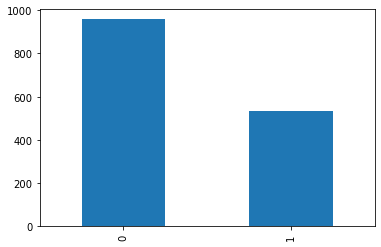

In [11]:
train_df["TravelInsurance"].value_counts().plot(kind="bar")
plt.show()

In [12]:
annual_income_unique = train_df["AnnualIncome"].unique()

In [13]:
annual_income_unique.sort()
annual_income_unique

array([ 300000,  350000,  400000,  450000,  500000,  550000,  600000,
        650000,  700000,  750000,  800000,  850000,  900000,  950000,
       1000000, 1050000, 1100000, 1150000, 1200000, 1250000, 1300000,
       1350000, 1400000, 1450000, 1500000, 1550000, 1650000, 1700000,
       1750000, 1800000], dtype=int64)

Probablemente podamos poner el income y las edades en buckets o en categorías. También podríamos armar categorías para "familias numerosas"

In [14]:
train_df["IncomeGroup"] = pd.qcut(train_df["AnnualIncome"], 5, labels=["Lower", "Mid-low", "Mid", "Mid-high", "High"])
test_df["IncomeGroup"] = pd.qcut(test_df["AnnualIncome"], 5, labels=["Lower", "Mid-low", "Mid", "Mid-high", "High"])

In [15]:
train_df["IncomeGroup"].value_counts()

Lower       346
Mid-low     328
Mid         297
High        267
Mid-high    252
Name: IncomeGroup, dtype: int64

### Agrupando por tipo de familia

Probablemente podamos obtener mejores resultados al clasificar las familias según su tamaño

In [16]:
family_bins = [0, 2, 4, np.inf]
family_labels = ["Nucleus", "Small", "Big"]
train_df["FamilyType"] = pd.cut(train_df["FamilyMembers"], family_bins, labels=family_labels)
test_df["FamilyType"] = pd.cut(test_df["FamilyMembers"], family_bins, labels=family_labels)

In [17]:
train_df[["FamilyType", "FamilyMembers"]]

,FamilyType,FamilyMembers
0,Big,6
1,Big,7
2,Small,4
3,Big,7
4,Small,3
...,...,...
1485,Big,5
1486,Small,3
1487,Big,5
1488,Big,5


<AxesSubplot:>

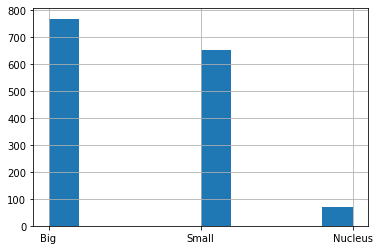

In [18]:
train_df["FamilyType"].hist()

### Un nuevo feature: ingresos por encima de la media etaria

In [19]:
train_df["AgeGroups"] = pd.cut(train_df["Age"], [-np.inf, 27, 32, np.inf], labels=["0_26", "27_32", "33+"])
test_df["AgeGroups"] = pd.cut(test_df["Age"], [-np.inf, 27, 32, np.inf], labels=["0_26", "27_32", "33+"])

In [20]:
income_mean_by_age_group = train_df[["AgeGroups", "AnnualIncome"]].groupby(by="AgeGroups").mean("AnnualIncome")

In [21]:
income_mean_by_age_group

,AnnualIncome
AgeGroups,
0_26,1.025316e+06
27_32,8.615713e+05
33+,9.946176e+05


In [22]:
income_mean_by_age_group.loc["0_26"]

AnnualIncome    1.025316e+06
Name: 0_26, dtype: float64

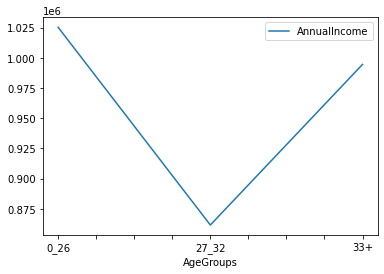

In [23]:
income_mean_by_age_group.plot()
plt.show()

In [24]:
train_df["GroupMeanIncome"] = income_mean_by_age_group["AnnualIncome"][train_df["AgeGroups"]].values
test_df["GroupMeanIncome"] = income_mean_by_age_group["AnnualIncome"][test_df["AgeGroups"]].values

In [25]:
train_df["AgeGroupIncomeFromMean"] = train_df["AnnualIncome"] - income_mean_by_age_group["AnnualIncome"][train_df["AgeGroups"]].values
test_df["AgeGroupIncomeFromMean"] = test_df["AnnualIncome"] - income_mean_by_age_group["AnnualIncome"][test_df["AgeGroups"]].values

In [26]:
train_df["AgeGroupAboveMean"] = pd.qcut(train_df["AgeGroupIncomeFromMean"], 5, labels=[1, 2, 3, 4, 5])
test_df["AgeGroupAboveMean"] = pd.qcut(test_df["AgeGroupIncomeFromMean"], 5, labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

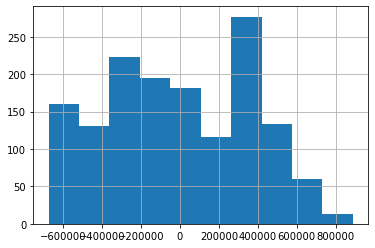

In [27]:
train_df["AgeGroupIncomeFromMean"].hist()

<AxesSubplot:>

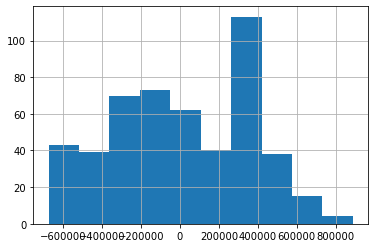

In [28]:
test_df["AgeGroupIncomeFromMean"].hist()

In [29]:
train_df["AgeGroupIncomeMeanGroups"] = pd.cut(train_df["AgeGroupIncomeFromMean"], [-np.inf, -400000, 0, 400000, np.inf], labels=[-2, -1, 1, 2]).astype("int32")
test_df["AgeGroupIncomeMeanGroups"] = pd.cut(test_df["AgeGroupIncomeFromMean"], [-np.inf, -400000, 0, 400000, np.inf], labels=[-2, -1, 1, 2]).astype("int32")
test_df[["AgeGroupIncomeMeanGroups", "AgeGroupIncomeFromMean"]]

,AgeGroupIncomeMeanGroups,AgeGroupIncomeFromMean
0,1,238428.745432
1,-1,-111571.254568
2,2,638428.745432
3,2,538428.745432
4,2,505382.436261
...,...,...
492,2,755382.436261
493,1,124683.544304
494,1,188428.745432
495,-1,-275316.455696


<AxesSubplot:>

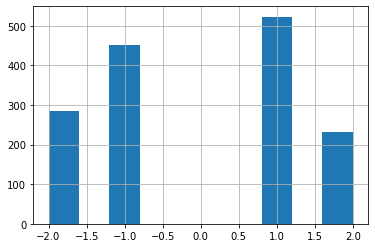

In [30]:
train_df["AgeGroupIncomeMeanGroups"].hist()

<AxesSubplot:>

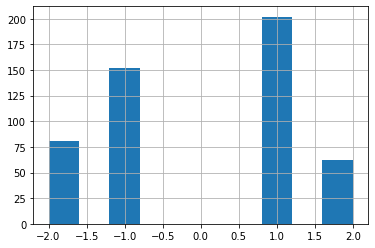

In [31]:
test_df["AgeGroupIncomeMeanGroups"].hist()

In [32]:
test_df[["Age", "AgeGroupIncomeMeanGroups", "AnnualIncome", "AgeGroupIncomeFromMean", "GroupMeanIncome"]]

,Age,AgeGroupIncomeMeanGroups,AnnualIncome,AgeGroupIncomeFromMean,GroupMeanIncome
0,29,1,1100000,238428.745432,8.615713e+05
1,28,-1,750000,-111571.254568,8.615713e+05
2,31,2,1500000,638428.745432,8.615713e+05
3,28,2,1400000,538428.745432,8.615713e+05
4,33,2,1500000,505382.436261,9.946176e+05
...,...,...,...,...,...
492,33,2,1750000,755382.436261,9.946176e+05
493,25,1,1150000,124683.544304,1.025316e+06
494,29,1,1050000,188428.745432,8.615713e+05
495,25,-1,750000,-275316.455696,1.025316e+06


In [33]:
train_df["IncomePerFamilyMember"] = train_df["AnnualIncome"] / train_df["FamilyMembers"]
test_df["IncomePerFamilyMember"] = test_df["AnnualIncome"] / test_df["FamilyMembers"]

In [34]:
train_df["IncomePerFamilyMemberQ"] = pd.qcut(train_df["IncomePerFamilyMember"], q=5, labels=[1, 2, 3, 4, 5])
test_df["IncomePerFamilyMemberQ"] = pd.qcut(test_df["IncomePerFamilyMember"], q=5, labels=[1, 2, 3, 4, 5])

array([[<AxesSubplot:title={'center':'IncomePerFamilyMember'}>]],
      dtype=object)

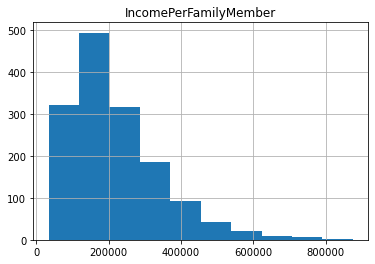

In [35]:
train_df[["IncomePerFamilyMember"]].hist()

array([[<AxesSubplot:title={'center':'IncomePerFamilyMember'}>]],
      dtype=object)

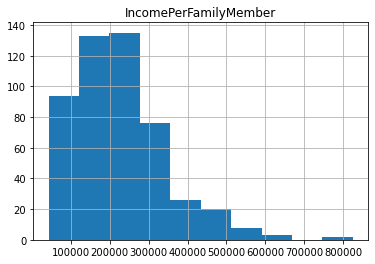

In [36]:
test_df[["IncomePerFamilyMember"]].hist()

### Features y target

In [37]:
def plot_category(category, dataframe, ax=None):
    groupped_df = pd.DataFrame(train_df[[category, "TravelInsurance"]].groupby([category, "TravelInsurance"]).size())
    plot_df = groupped_df.unstack()[0].reset_index()
    plot_df.set_index(category).plot(kind="bar", stacked=True, ax=ax)
    ax.set_title(category)
    ax.set_xlabel(None)
    ax.tick_params(labelrotation=0)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

In [38]:
plot_columns = ["Age", "IncomeGroup", "Employment Type", "GraduateOrNot", "FamilyMembers", "FamilyType", "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad", "AgeGroups", "AgeGroupAboveMean", "IncomePerFamilyMemberQ", "AgeGroupIncomeMeanGroups"]

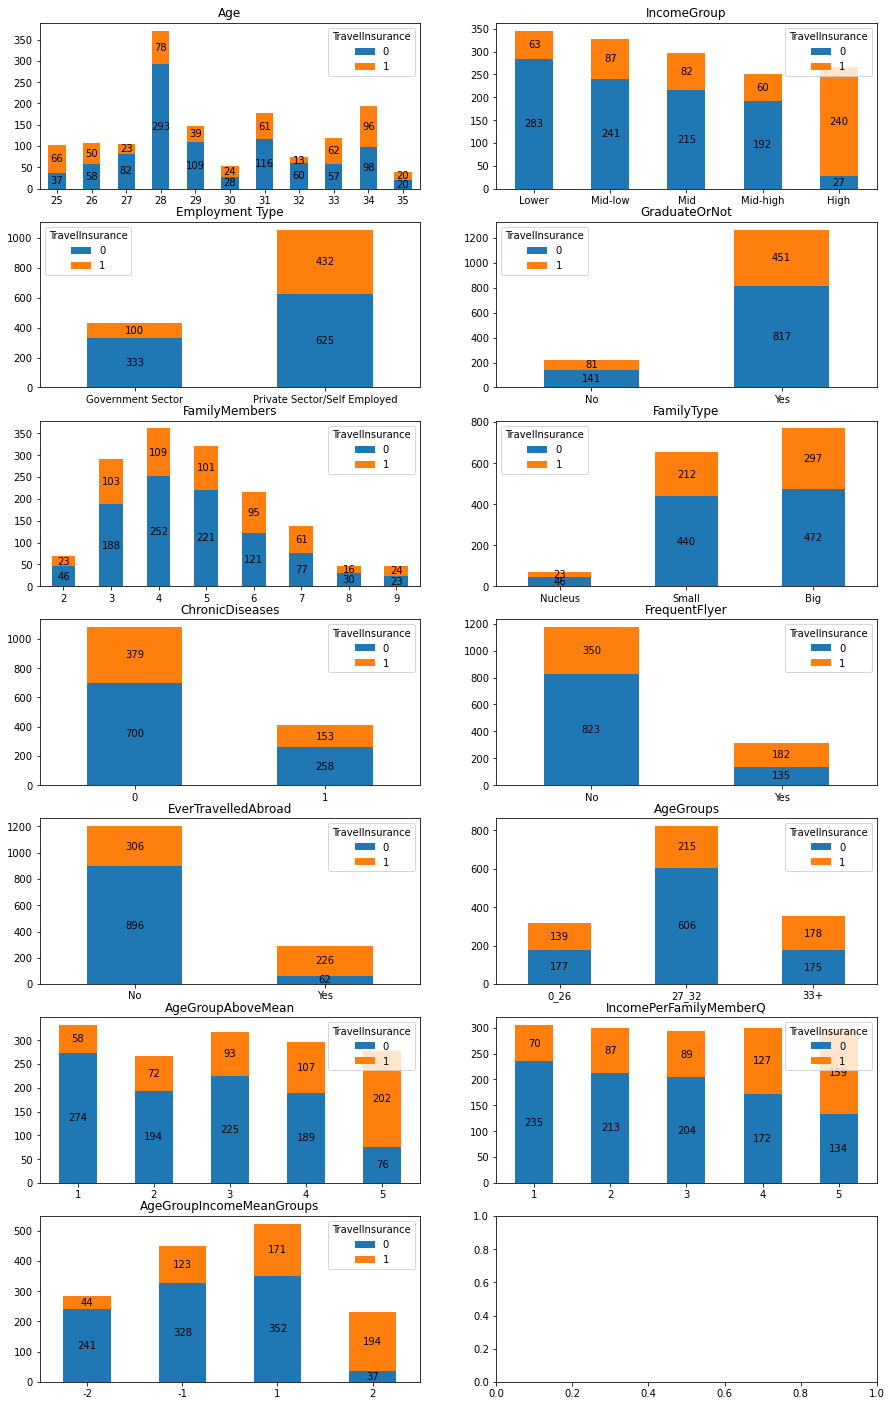

In [39]:
fig, axes = plt.subplots(math.ceil(len(plot_columns)/2.0), 2, figsize=(15,25))
for i, col in enumerate(plot_columns):
    prow = math.floor(i / 2)
    pcol = int(i % 2)
    plot_category(col, train_df, axes[prow, pcol])

In [40]:
from sklearn.metrics import classification_report, f1_score, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

In [41]:
def best_metrics(model, params, X_train, y_train):
    recall_scorer = make_scorer(recall_score, pos_label=1, average="binary")
    gsCV = GridSearchCV(model, params, cv=5, scoring="f1", n_jobs=-1, refit=True)
    gsCV.fit(X_train, y_train)
    best_gsCV = gsCV.best_estimator_
    print('Metricas\n')
    print(classification_report(y_train, best_gsCV.predict(X_train)))
    print("F1 score: ", round(f1_score(y_train,  best_gsCV.predict(X_train)) ,2))
    print("Mejores parametros: ", gsCV.best_params_)
    return gsCV

### Fixing dataframe

In [42]:
def mangle_columns(df):
    drop_cols = ["Age", "Employment Type", "GraduateOrNot", "IncomeGroup", "AnnualIncome", "Customer", "AgeGroupAboveMean", "AgeGroupIncomeFromMean", "GroupMeanIncome", "IncomePerFamilyMember", "AgeGroups", "IncomePerFamilyMemberQ", "FamilyType", "FamilyMembers", "AgeGroupIncomeMeanGroups"]
    out_df = df.copy()
    out_df["SelfEmployed?"] = pd.get_dummies(train_df["Employment Type"], drop_first=True)
    out_df["GraduateOrNot"] = pd.get_dummies(train_df["GraduateOrNot"], drop_first=True)
    out_df["EverTravelledAbroad"] = pd.get_dummies(train_df["EverTravelledAbroad"], drop_first=True)
    out_df["FrequentFlyer"] = pd.get_dummies(train_df["FrequentFlyer"], drop_first=True)
    
    dummies = pd.get_dummies(train_df["IncomeGroup"], prefix="IncomeGroup")
    out_df[dummies.columns] = dummies
    
    dummies = pd.get_dummies(train_df["AgeGroups"], prefix="AgeGroups")
    out_df[dummies.columns] = dummies
    
    dummies = pd.get_dummies(train_df["IncomePerFamilyMemberQ"], prefix="IncomePerFamilyMemberQ")
    out_df[dummies.columns] = dummies
    
    dummies = pd.get_dummies(train_df["FamilyType"], prefix="FamilyType")
    out_df[dummies.columns] = dummies
    
    dummies = pd.get_dummies(train_df["AgeGroupIncomeMeanGroups"], prefix="AgeGroupIncomeMeanGroups")
    out_df[dummies.columns] = dummies
    
    out_df = out_df.drop(columns=drop_cols)
    return out_df

In [43]:
mangle_columns(train_df)

,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,SelfEmployed?,IncomeGroup_Lower,IncomeGroup_Mid-low,IncomeGroup_Mid,IncomeGroup_Mid-high,IncomeGroup_High,...,IncomePerFamilyMemberQ_3,IncomePerFamilyMemberQ_4,IncomePerFamilyMemberQ_5,FamilyType_Nucleus,FamilyType_Small,FamilyType_Big,AgeGroupIncomeMeanGroups_-2,AgeGroupIncomeMeanGroups_-1,AgeGroupIncomeMeanGroups_1,AgeGroupIncomeMeanGroups_2
0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1486,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1487,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1488,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


### Primer approach explorando varios modelos

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

In [45]:
def test_models(X, y):
    models = [
        SGDClassifier,
        SVC,
        KNeighborsClassifier,
        # GaussianProcessClassifier,
        GaussianNB, BernoulliNB,
        DecisionTreeClassifier,
        RandomForestClassifier,
        GradientBoostingClassifier,
        XGBClassifier

    ]
    
    not_random_models = [KNeighborsClassifier, GaussianNB, BernoulliNB]
    
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=140)

    best_score = 0
    best_clf = None
    for model in models:
        print("===========")
        print(f"Model: {model.__name__}")
        
        if model in not_random_models:
            clf = model()
        else:
            clf = model(random_state=189)

        clf.fit(X, y)

        recall = recall_score(y_validate, clf.predict(X_validate), pos_label=1, average="binary")
        f1 = f1_score(y_validate, clf.predict(X_validate), pos_label=1, average="binary")

        print(f"Recall of positive class: {recall:.4f}")
        print(f"f1 score: {f1:.4f}")
        
        if f1 > best_score:
            best_clf = clf
    return best_clf

In [46]:
from sklearn.utils import resample

sanitized_data = mangle_columns(train_df)

df_majority = sanitized_data[sanitized_data.TravelInsurance==0]
df_minority = sanitized_data[sanitized_data.TravelInsurance==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=189)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [47]:
X = df_upsampled.drop(columns=["TravelInsurance"])
y = df_upsampled["TravelInsurance"]
clf = test_models(X, y)

Model: SGDClassifier
Recall of positive class: 0.6667
f1 score: 0.6667
Model: SVC
Recall of positive class: 0.6667
f1 score: 0.7519
Model: KNeighborsClassifier
Recall of positive class: 0.7733
f1 score: 0.7785
Model: GaussianNB
Recall of positive class: 0.5200
f1 score: 0.6341
Model: BernoulliNB
Recall of positive class: 0.5333
f1 score: 0.6400
Model: DecisionTreeClassifier
Recall of positive class: 0.7333
f1 score: 0.8148
Model: RandomForestClassifier
Recall of positive class: 0.7600
f1 score: 0.7917
Model: GradientBoostingClassifier
Recall of positive class: 0.6533
f1 score: 0.7481
Model: XGBClassifier
[18:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall of positive class: 0.7467
f1 score: 0.8058


C:\Users\gabyd\anaconda3\envs\Diplo\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [48]:
train_df_clean = mangle_columns(train_df)
X = train_df_clean.drop(columns=["TravelInsurance"])
y = train_df_clean["TravelInsurance"]
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=140)

params_xgb = {
    'scale_pos_weight': [1, 1.8007],
    "max_depth": [5, 6],
    "learning_rate": [0.1],
    "gamma": [0],
    "min_child_weight": [1, 2, 5],
    "reg_lambda": [1],
    "subsample": [0.8],
    "colsample_bytree": [0.6],
    "eval_metric": ["auc", "logloss"]
}

results = best_metrics(XGBClassifier(use_label_encoder=False, tree_method='gpu_hist', predictor='gpu_predictor', nthread=1), params_xgb, X_train, y_train)


Metricas

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       870
           1       0.87      0.60      0.71       480

    accuracy                           0.83      1350
   macro avg       0.84      0.78      0.79      1350
weighted avg       0.83      0.83      0.82      1350

F1 score:  0.71
Mejores parametros:  {'colsample_bytree': 0.6, 'eval_metric': 'auc', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


In [49]:
xgb_estimator = results.best_estimator_

### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [50]:
print(classification_report(y_validate, xgb_estimator.predict(X_validate)))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        88
           1       0.87      0.50      0.63        52

    accuracy                           0.79       140
   macro avg       0.82      0.73      0.74       140
weighted avg       0.80      0.79      0.77       140



In [51]:
params_xgb = {
    'scale_pos_weight': [1],
    "max_depth": [5, 6],
    "learning_rate": [0.1],
    "gamma": [0],
    "min_child_weight": [1, 2, 5],
    "reg_lambda": [1],
    "subsample": [0.8],
    "colsample_bytree": [0.6],
    "eval_metric": ["auc", "logloss"]
}

results = best_metrics(XGBClassifier(use_label_encoder=False, tree_method='gpu_hist', predictor='gpu_predictor', nthread=1), params_xgb, X, y)


Metricas

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       958
           1       0.88      0.63      0.73       532

    accuracy                           0.84      1490
   macro avg       0.85      0.79      0.81      1490
weighted avg       0.84      0.84      0.83      1490

F1 score:  0.73
Mejores parametros:  {'colsample_bytree': 0.6, 'eval_metric': 'auc', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


## Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [52]:
df_upsampled.drop(columns=["TravelInsurance"]).columns

Index(['ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'SelfEmployed?', 'IncomeGroup_Lower', 'IncomeGroup_Mid-low',
       'IncomeGroup_Mid', 'IncomeGroup_Mid-high', 'IncomeGroup_High',
       'AgeGroups_0_26', 'AgeGroups_27_32', 'AgeGroups_33+',
       'IncomePerFamilyMemberQ_1', 'IncomePerFamilyMemberQ_2',
       'IncomePerFamilyMemberQ_3', 'IncomePerFamilyMemberQ_4',
       'IncomePerFamilyMemberQ_5', 'FamilyType_Nucleus', 'FamilyType_Small',
       'FamilyType_Big', 'AgeGroupIncomeMeanGroups_-2',
       'AgeGroupIncomeMeanGroups_-1', 'AgeGroupIncomeMeanGroups_1',
       'AgeGroupIncomeMeanGroups_2'],
      dtype='object')

In [53]:
X_test = mangle_columns(test_df)
X_test.columns

Index(['ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'SelfEmployed?', 'IncomeGroup_Lower', 'IncomeGroup_Mid-low',
       'IncomeGroup_Mid', 'IncomeGroup_Mid-high', 'IncomeGroup_High',
       'AgeGroups_0_26', 'AgeGroups_27_32', 'AgeGroups_33+',
       'IncomePerFamilyMemberQ_1', 'IncomePerFamilyMemberQ_2',
       'IncomePerFamilyMemberQ_3', 'IncomePerFamilyMemberQ_4',
       'IncomePerFamilyMemberQ_5', 'FamilyType_Nucleus', 'FamilyType_Small',
       'FamilyType_Big', 'AgeGroupIncomeMeanGroups_-2',
       'AgeGroupIncomeMeanGroups_-1', 'AgeGroupIncomeMeanGroups_1',
       'AgeGroupIncomeMeanGroups_2'],
      dtype='object')

In [54]:
X_test = mangle_columns(test_df)

test_id = test_df["Customer"]
test_pred = results.best_estimator_.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("../data/travel_insurance_submission_xgb_sanitized.csv", header=True, index=False)